# 1.冒泡排序（bubble）

It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place.

- The statement a, b = b, a will result in two assignment statements being done at the same time 
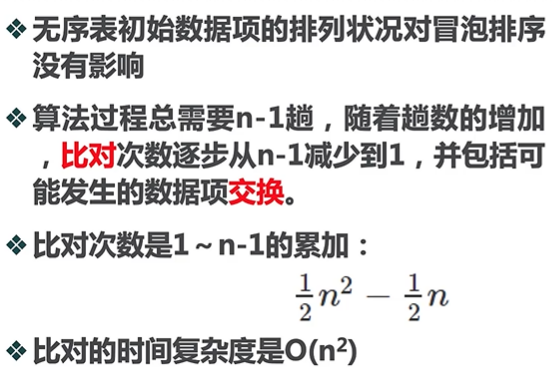

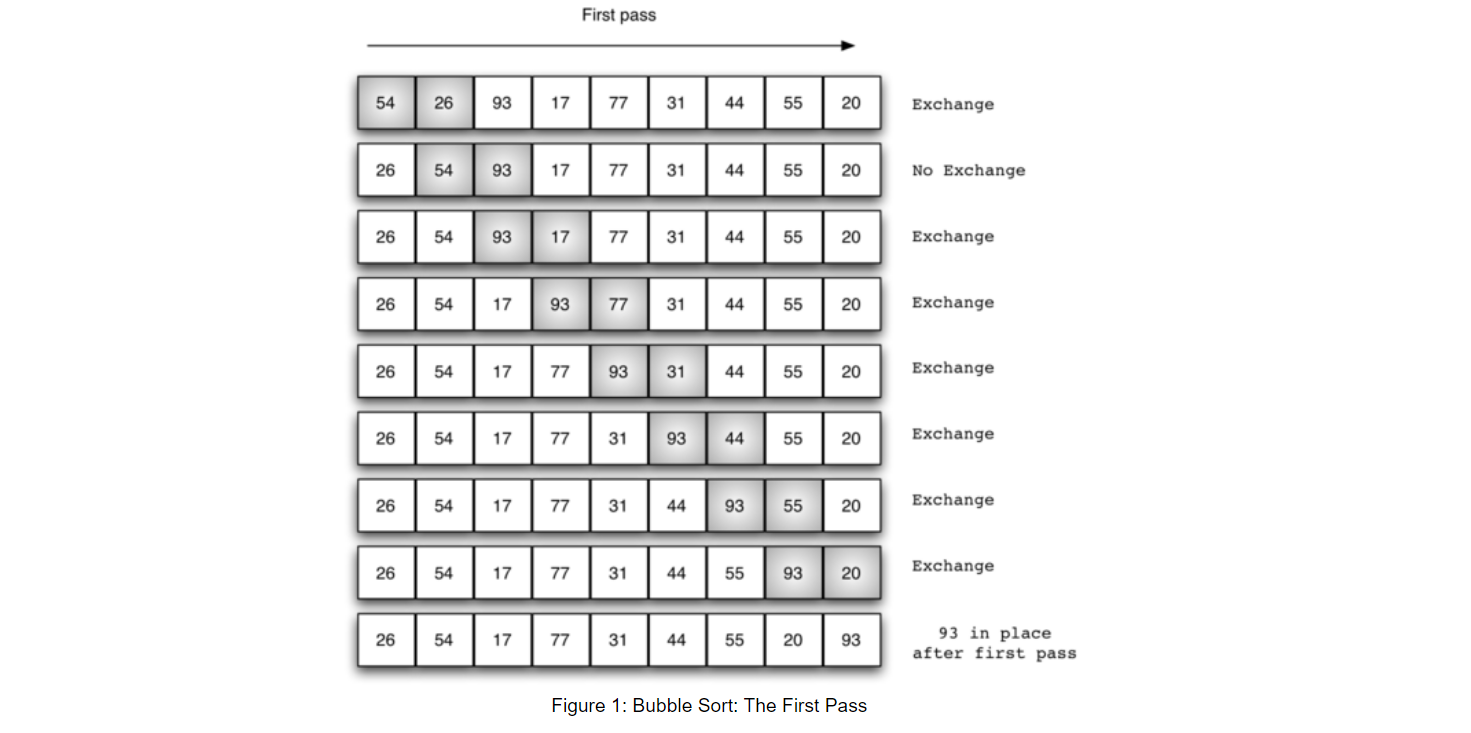

In [1]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                alist[i],alist[i+1] = alist[i+1],alist[i]                

In [2]:
alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
alist

[17, 20, 26, 31, 44, 54, 55, 77, 93]

In [3]:
#改进版
def shortBubbleSort(alist):
    exchange = True
    passnum = len(alist) - 1
    while passnum > 0 and exchange:
        exchange = False
        for i in range(passnum):
            if alist[i] > alist[i+1]:
                exchange = True
                alist[i],alist[i+1] = alist[i+1],alist[i]
        passnum = passnum-1
    return alist

In [4]:
print(shortBubbleSort([54,26,93,17,77,31,44,55,20]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


# 2. 选择排序（selection）
The selection sort improves on the bubble sort by making only one exchange for every pass through the list. In order to do this, a selection sort looks for the largest value as it makes a pass and, after completing the pass, places it in the proper location.

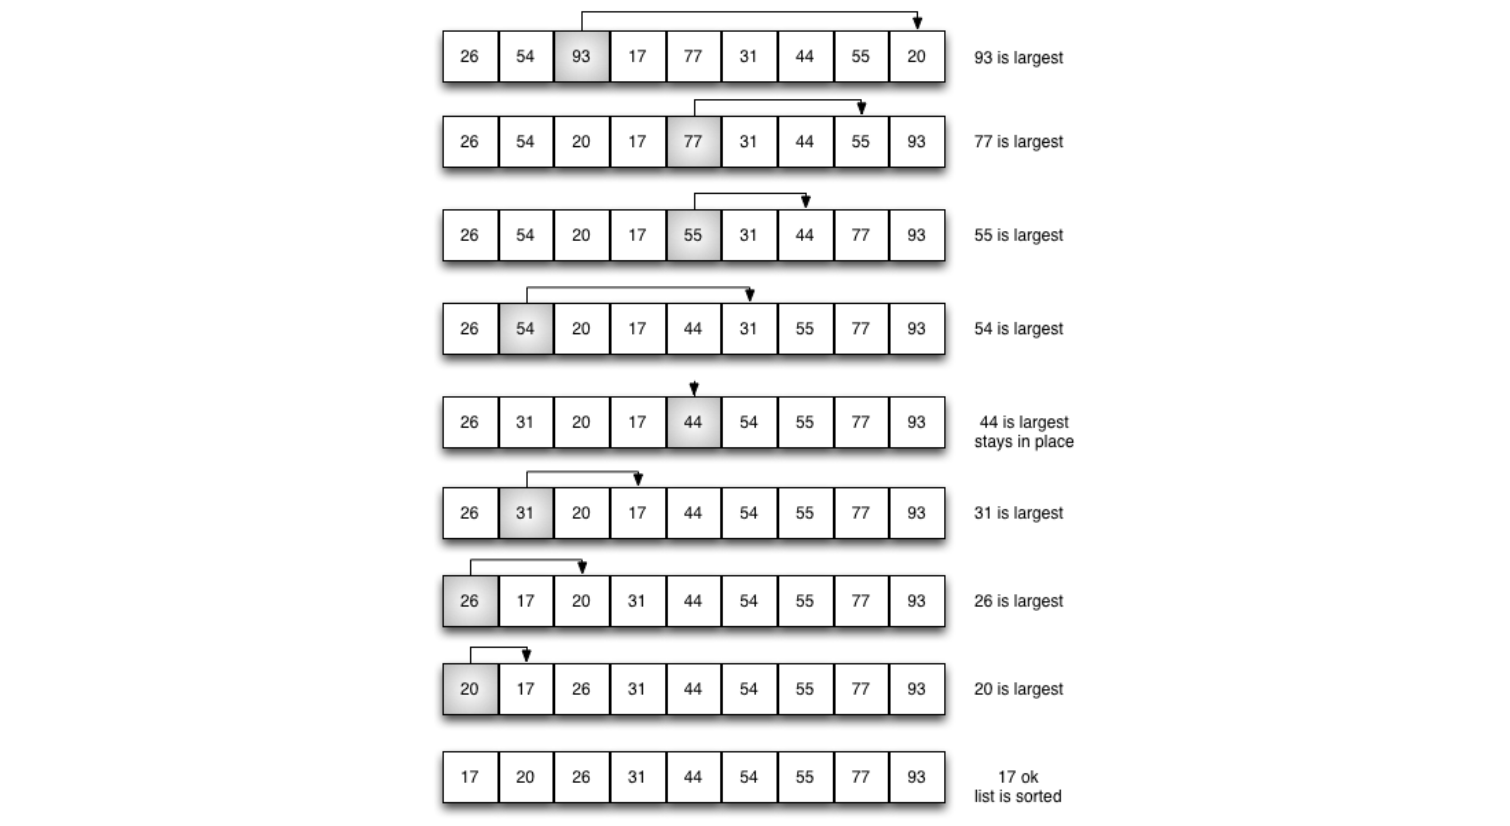

Complex: O(n2). However, due to the reduction in the number of exchanges

In [4]:
def selectionSort(alist):
    for fillslot in range(len(alist)-1,0,-1):
        positionOfMax = 0
        for location in range(1,fillslot+1):
            if alist[location]>alist[positionOfMax]:
                positionOfMax = location
        alist[fillslot],alist[positionOfMax] = alist[positionOfMax],alist[fillslot]

In [5]:
alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
alist

[17, 20, 26, 31, 44, 54, 55, 77, 93]

# 3. 插入排序（insertion）
每一项做为一个新项插入到子列表，总共经管n-1趟比对和插入  
It always maintains a sorted sublist in the lower positions of the list. Each new item is then “inserted” back into the previous sublist such that the sorted sublist is one item larger.

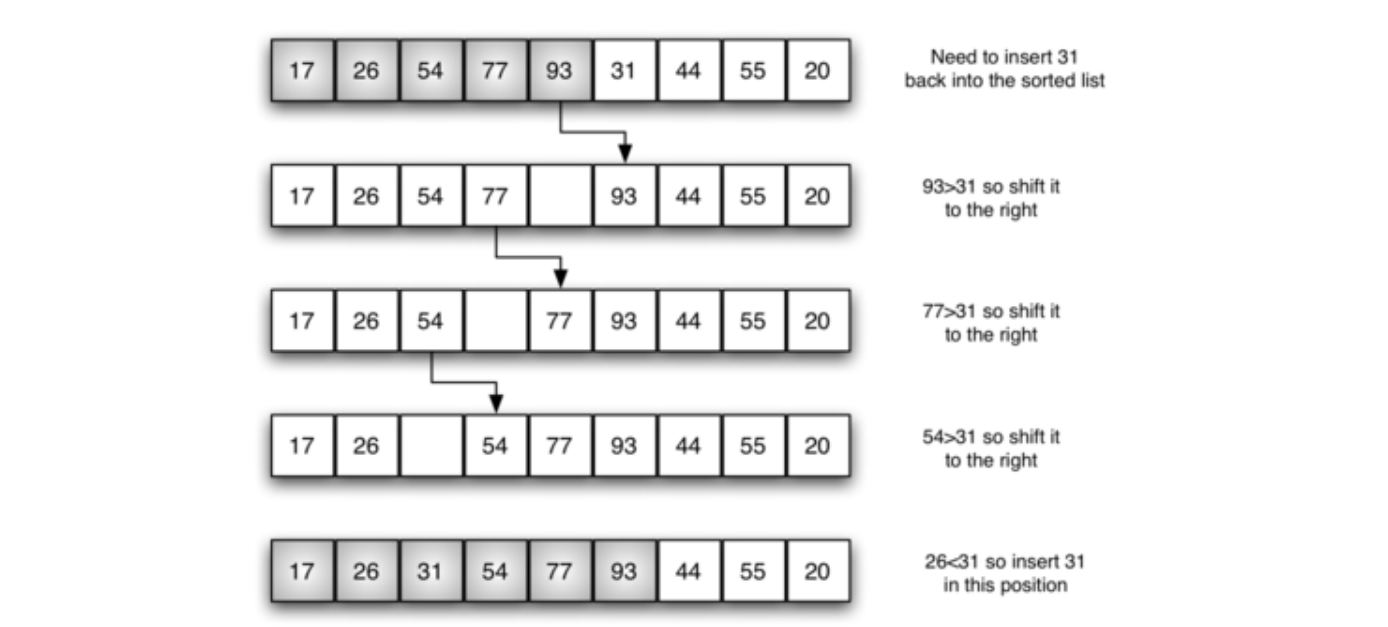

**Complex:** is O(n2). However, in the best case, only one comparison needs to be done on each pass. This would be the case for an already sorted list.

In [13]:
def insertionSort(alist):
    for index in range(1,len(alist)):
        currentvalue = alist[index]
        position = index
        while position>0 and alist[position-1]>currentvalue:
            alist[position]=alist[position-1]
            position = position-1
        alist[position]=currentvalue

In [17]:
alist = [54,26,93,17,77,31,44,55,20]
insertionSort(alist)
alist

[17, 20, 26, 31, 44, 54, 55, 77, 93]

# 4. 谢尔排序（shell）
以插入排序为基础，对无序表进行间隔划分子列表，每个子列表都执行插入排序  
最后一趟为标准的插入排序，一般子列表间隔从n/2开始

The Shell sort, sometimes called the **“diminishing increment sort,”** improves on the insertion sort by breaking the original list into a number of smaller sublists, each of which is sorted using an insertion sort. 
- create sublist by choosing all item that are i item apart.--- gap
- sort each **sublists** by **insertion sort**.
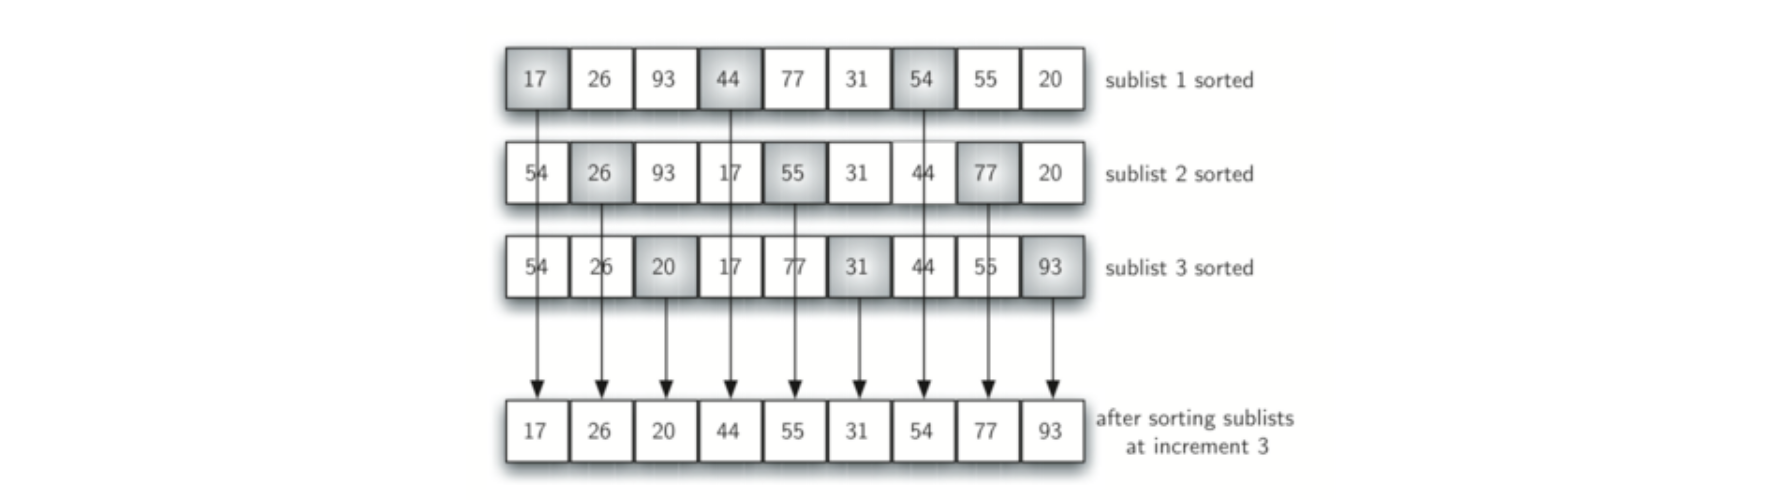
- Again final insertion sort.
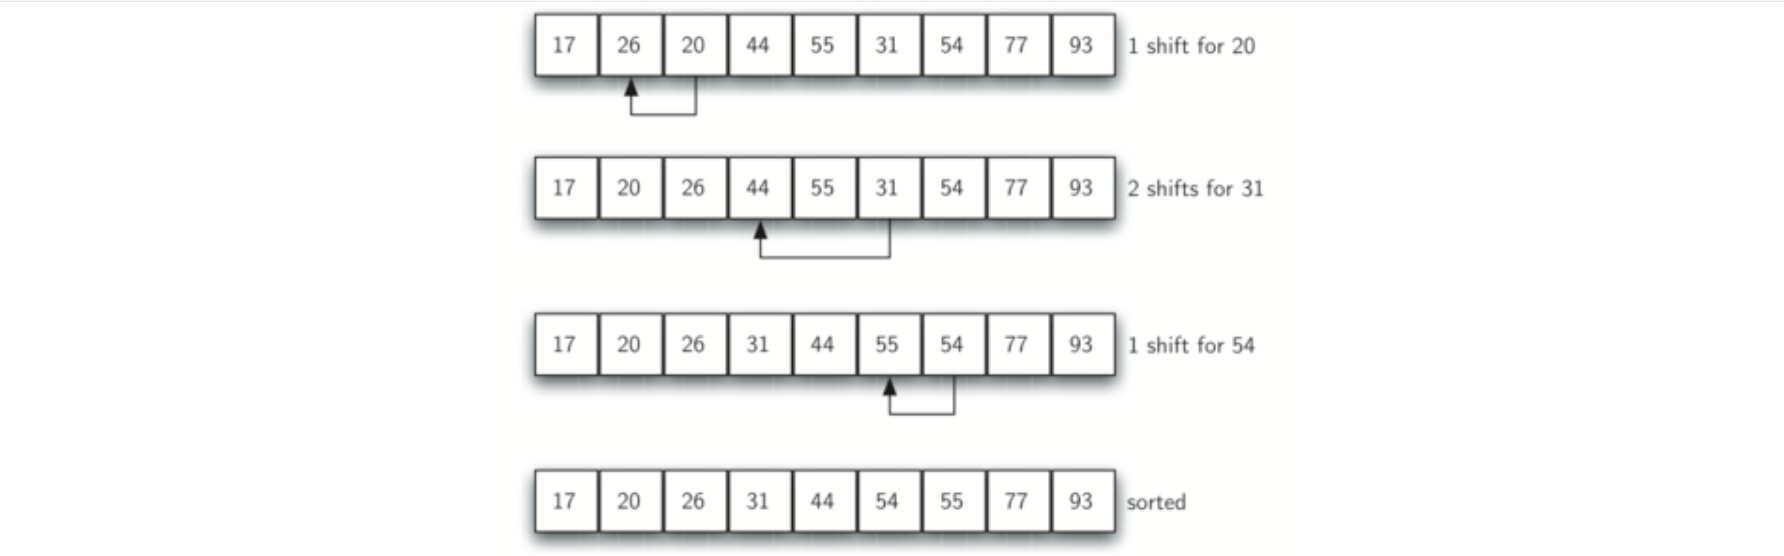

`The final insertion sort does not need to do very many comparisons (or shifts) since the list has been pre-sorted by earlier incremental insertion sorts, as described above.`

`In other words, each pass produces a list that is “more sorted” than the previous one. This makes the final pass very efficient.`

In [18]:
def shellSort(alist):
    sublistcount = len(alist)//2  #子列表个数
    while sublistcount > 0:
        for startposition in range(sublistcount):
            gapInsertionSort(alist,startposition,sublistcount)
        print("After increments of size",sublistcount,"The list is",alist)
        sublistcount = sublistcount//2
        
def gapInsertionSort(alist,start,gap):
    for i in range(start+gap,len(alist),gap):
        currentvalue = alist[i]
        position = i
        while position >= gap and alist[position-gap] > currentvalue:
            alist[position] = alist[position-gap]
            position = position - gap
        alist[position] = currentvalue

In [19]:
alist = [54,26,93,17,77,31,44,55,20]
shellSort(alist)
alist

After increments of size 4 The list is [20, 26, 44, 17, 54, 31, 93, 55, 77]
After increments of size 2 The list is [20, 17, 44, 26, 54, 31, 77, 55, 93]
After increments of size 1 The list is [17, 20, 26, 31, 44, 54, 55, 77, 93]


[17, 20, 26, 31, 44, 54, 55, 77, 93]

# 5. 归并排序（merge）
Using a **divide and conquer** strategy as a way to improve the performance of sorting algorithms. 

Merge sort is a **recursive** algorithm that continually **splits a list in half.**

- split
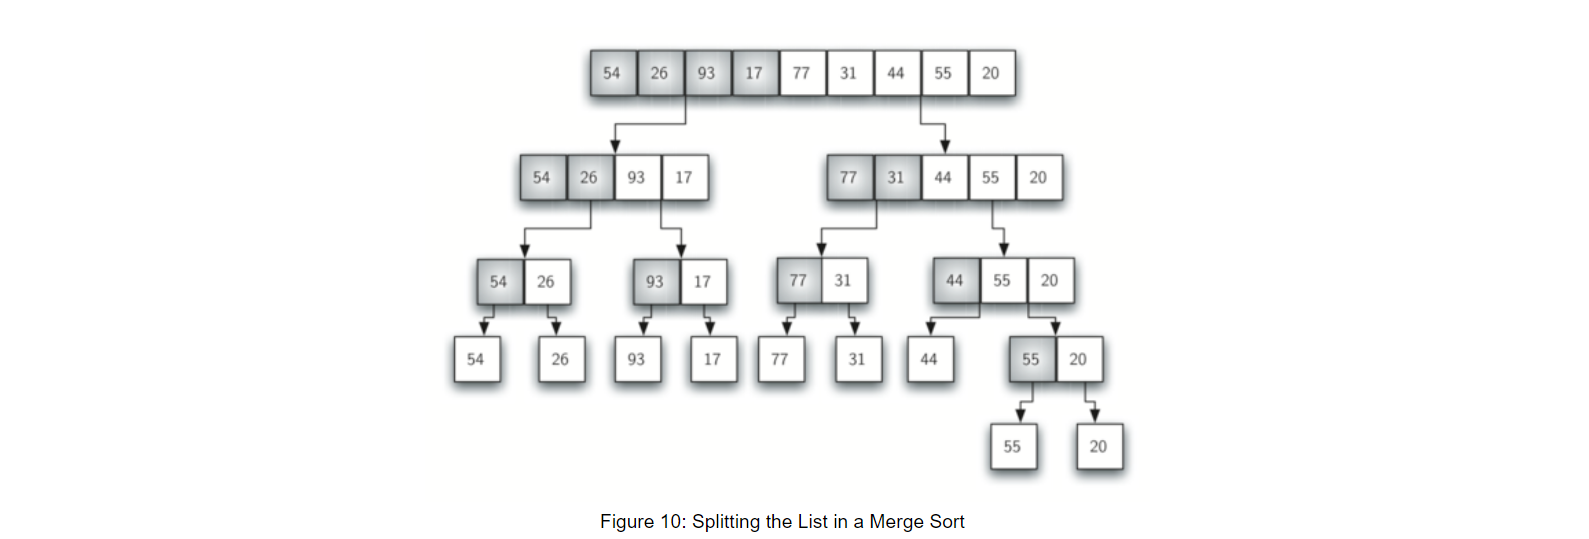
- merge
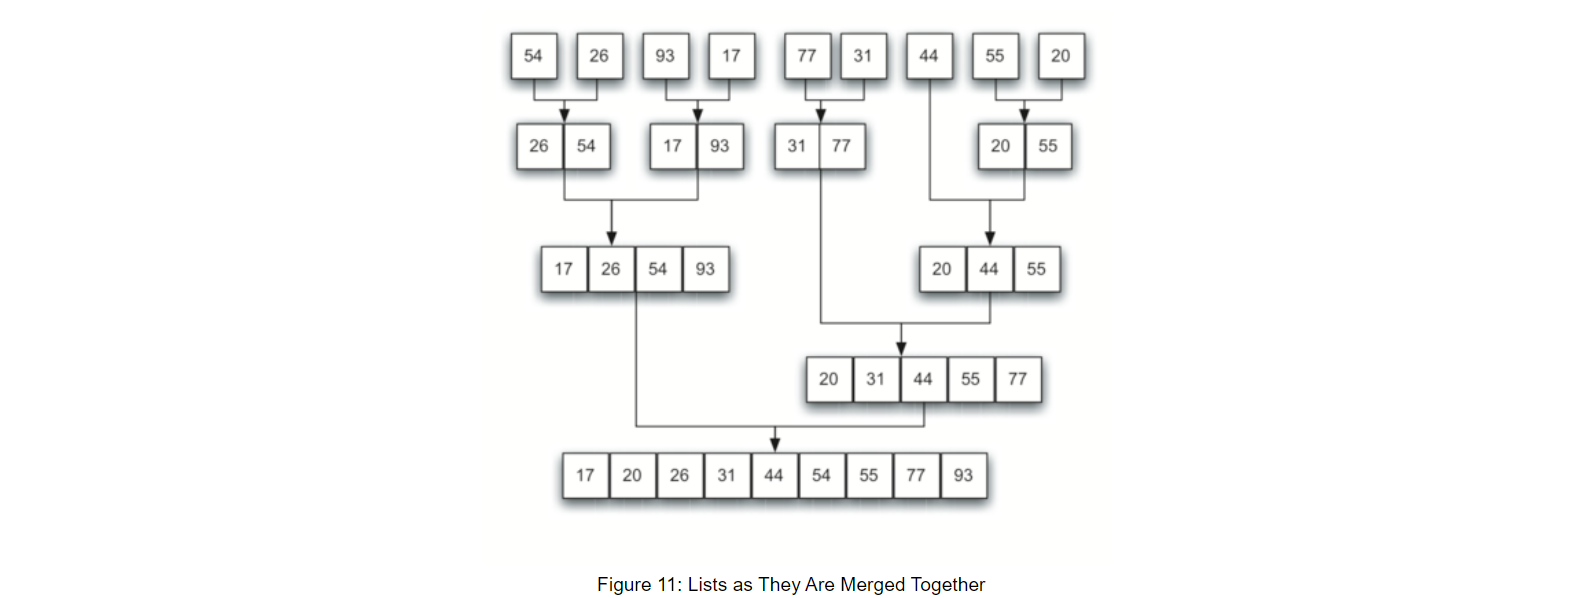

In [5]:
#传统代码
def mergeSort(alist):
    #基本结束条件
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        #递归调用
        mergeSort(lefthalf)
        mergeSort(righthalf)
        
        #把左右部分从大到小归并到结果列表中
        i= j= k= 0
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                alist[k] = lefthalf[i]
                i += 1
            else:
                alist[k] = righthalf[j]
                j += 1
            k += 1
        #归并左半部分剩余项
        while i<len(lefthalf):
            alist[k] = lefthalf[i]
            i += 1
            k += 1
            
        #归并右半部分剩余项
        while j<len(righthalf):
            alist[k] = righthalf[j]
            j += 1
            k += 1

In [6]:
alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
alist

[17, 20, 26, 31, 44, 54, 55, 77, 93]

In [7]:
# pythonic写法
def merge_sort(lst):
    #递归结束条件
    if len(lst) <= 1:
        return lst
    
    #分解问题，并递归调用
    middle = len(lst) // 2
    left = merge_sort(lst[:middle])   #左半部排好序
    right = merge_sort(lst[middle:])  #右半部分排好序
    
    #合并左右半部，完成排序
    merged = []
    while left and right:
        if left[0] <= right[0]:
            merged.append(left.pop(0))
        else:
            merged.append(right.pop(0))
    merged.extend(right if right else left)
    return merged

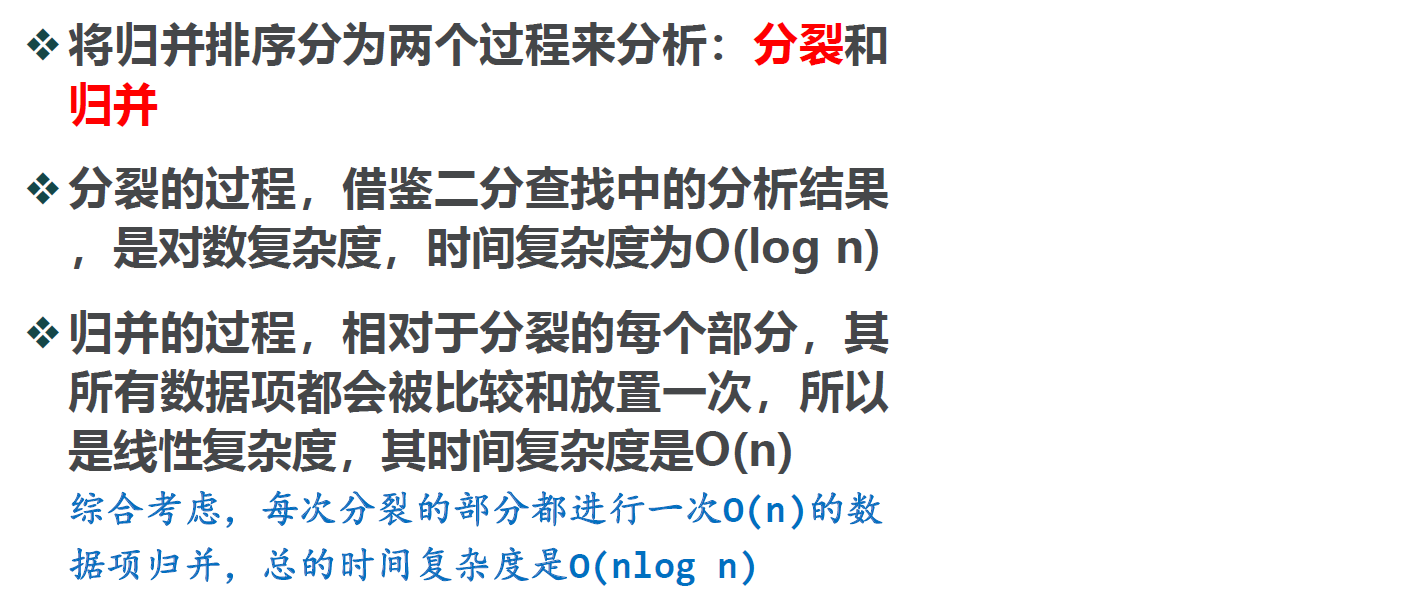

In [37]:
alist = [54,26,93,17,77,31,44,55,20]
merge_sort(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]

# 6.快速排序（quick）